In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

# 격자 스타일 적용
plt.style.use('ggplot')

# 마이너스 표시오류 방지
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 적용
mpl.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
#데이터 불러오기
raw1 = pd.read_excel('../매출전처리데이터/2015_전처리.xlsx', parse_dates=['매출일'])
raw2 = pd.read_excel('../매출전처리데이터/2016_전처리.xlsx', parse_dates=['매출일'])
raw3 = pd.read_excel('../매출전처리데이터/2017_전처리.xlsx', parse_dates=['매출일'])
raw4 = pd.read_excel('../매출전처리데이터/2018_전처리.xlsx', parse_dates=['매출일'])
raw5 = pd.read_excel('../매출전처리데이터/2019_전처리.xlsx', parse_dates=['매출일'])

In [3]:
#각년도별 잡곡품목명을 잡곡별로 분류한 데이터 불러오기
mxlst1 = pd.read_excel('../매출전처리데이터/15년 품목명 리스트_완.xlsx')
mxlst2 = pd.read_excel('../매출전처리데이터/16년 품목명 리스트_완.xlsx')
mxlst3 = pd.read_excel('../매출전처리데이터/17년 품목명 리스트_완.xlsx')
mxlst4 = pd.read_excel('../매출전처리데이터/18년 품목명 리스트_완.xlsx')
mxlst5 = pd.read_excel('../매출전처리데이터/19년 품목명 리스트_완.xlsx')

In [4]:
#데이터 중 필요한 columns명만 가져오기
data1 = raw1[['품목명', '규격명', '매출수량', '환산중량', '매출단가', '공급금액', '품종']]
data2 = raw2[['품목명', '규격명', '매출수량', '환산중량', '매출단가', '공급금액', '품종']]
data3 = raw3[['품목명', '규격명', '매출수량', '환산중량', '매출단가', '공급금액', '품종']]
data4 = raw4[['품목명', '규격명', '매출수량', '환산중량', '매출단가', '공급금액', '품종']]
data5 = raw5[['품목명', '규격명', '매출수량', '환산중량', '매출단가', '공급금액', '품종']]

In [5]:
#환산중량과 공급금액에서 0초과의 값을 가진 행만 가져오기
dt1 = data1[(data1.환산중량 > 0)&(data1.공급금액 > 0)].reset_index(drop = True)
dt2 = data2[(data2.환산중량 > 0)&(data1.공급금액 > 0)].reset_index(drop = True)
dt3 = data3[(data3.환산중량 > 0)&(data1.공급금액 > 0)].reset_index(drop = True)
dt4 = data4[(data4.환산중량 > 0)&(data1.공급금액 > 0)].reset_index(drop = True)
dt5 = data5[(data5.환산중량 > 0)&(data1.공급금액 > 0)].reset_index(drop = True)

In [6]:
#kg당 공급금액을 계산한 열 만들기
dt1['kg공급금액'] = dt1['공급금액']/dt1['환산중량']
dt2['kg공급금액'] = dt2['공급금액']/dt2['환산중량']
dt3['kg공급금액'] = dt3['공급금액']/dt3['환산중량']
dt4['kg공급금액'] = dt4['공급금액']/dt4['환산중량']
dt5['kg공급금액'] = dt5['공급금액']/dt5['환산중량']

In [7]:
#품목명으로 구분열 만들어주기

def lstsort(df, lst):
    
    result_df = df.copy()
    result_df['구분'] = np.nan
    
    for i in range(len(result_df)):

        if result_df['품종'][i] == '미곡':
            result_df['구분'][i] = '미곡'

        else:
            if result_df['품목명'][i] in list(lst.혼합):
                result_df['구분'][i] = '혼합'
            elif result_df['품목명'][i] in list(lst.흑미):
                result_df['구분'][i] = '흑미'
            elif result_df['품목명'][i] in list(lst.현미):
                result_df['구분'][i] = '현미'
            elif result_df['품목명'][i] in list(lst.보리):
                result_df['구분'][i] = '보리'
            elif result_df['품목명'][i] in list(lst.팥):
                result_df['구분'][i] = '팥'
            elif result_df['품목명'][i] in list(lst.콩):
                result_df['구분'][i] = '콩'
            elif result_df['품목명'][i] in list(lst.기장):
                result_df['구분'][i] = '기장'
            elif result_df['품목명'][i] in list(lst.귀리):
                result_df['구분'][i] = '귀리'
            elif result_df['품목명'][i] in list(lst.조):
                result_df['구분'][i] = '조'
            elif result_df['품목명'][i] in list(lst.수수):
                result_df['구분'][i] = '수수'
            elif result_df['품목명'][i] in list(lst.메밀):
                result_df['구분'][i] = '메밀'
            elif result_df['품목명'][i] in list(lst.율무):
                result_df['구분'][i] = '율무'
            else:
                result_df['구분'][i] = '기타'
                
    return result_df


In [8]:
# 위 코드 실행
df1 = lstsort(dt1, mxlst1)
df2 = lstsort(dt2, mxlst2)
df3 = lstsort(dt3, mxlst3)
df4 = lstsort(dt4, mxlst4)
df5 = lstsort(dt5, mxlst5)

C:\BigData\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\BigData\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\BigData\anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\BigData\anaconda3\lib\site-packages\ipykernel_launcher.py:11:

In [9]:
#이상값 계산 함수
def outliers_iqr(ys):
    
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    a = np.where((ys > upper_bound) | (ys < lower_bound))
    return a[0].tolist()

In [10]:
#이상값 제거
def outlierdrop(df, idx):
    dividelst = list(set(df.구분))
    dlst = []
    outlierdrop1 = pd.DataFrame(columns = df.columns.values)

    for i in range(len(dividelst)): #품목별로 이상치가 다르므로 품목별로 나누어 제거해줌.

        temp = df[df['구분']==dividelst[i]]
        temp.reset_index(drop=True, inplace=True)

        dlst = outliers_iqr(df[df['구분']==dividelst[i]][idx])
        tmp = temp.drop(dlst)
        outlierdrop1 = outlierdrop1.append(tmp)
    
    return outlierdrop1

In [11]:
#이상값 제거한 데이터 result로 저장
result1 = outlierdrop(df1, 'kg공급금액')
result2 = outlierdrop(df2, 'kg공급금액')
result3 = outlierdrop(df3, 'kg공급금액')
result4 = outlierdrop(df4, 'kg공급금액')
result5 = outlierdrop(df5, 'kg공급금액')

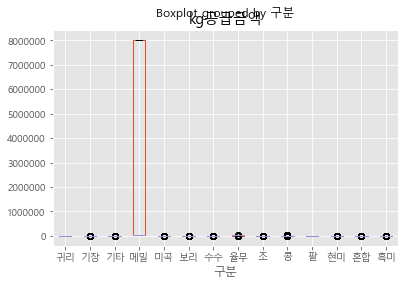

In [12]:
result1.boxplot(column='kg공급금액', by='구분')

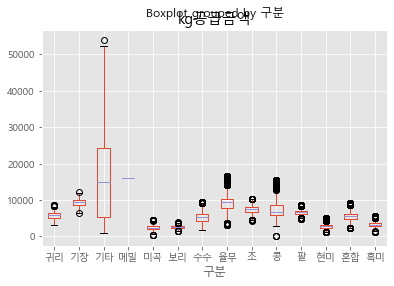

In [13]:
result2.boxplot(column='kg공급금액', by='구분')

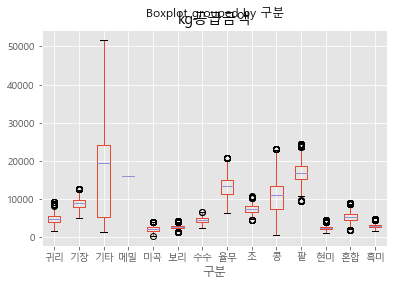

In [14]:
result3.boxplot(column='kg공급금액', by='구분')

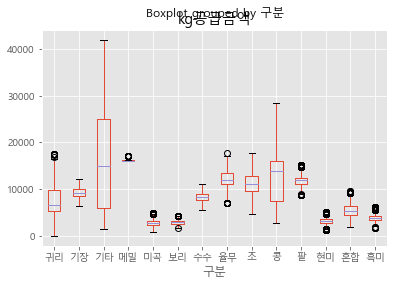

In [15]:
result4.boxplot(column='kg공급금액', by='구분')

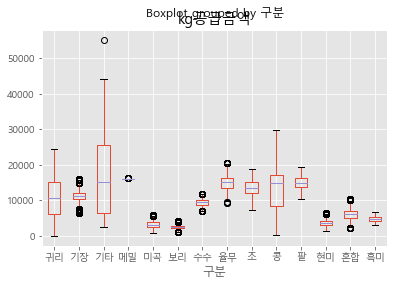

In [16]:
result5.boxplot(column= 'kg공급금액', by='구분')

In [25]:
#kg당 평균공급금액을 저장할 빈 데이터프레임 만들기
result = pd.DataFrame(
    index = ['귀리', '기장', '기타', '메밀', '미곡', '보리', '수수', '율무', '조', '콩', '팥', '현미', '혼합', '흑미'],
    columns = ['2015', '2016', '2017', '2018', '2019']
)
result

,2015,2016,2017,2018,2019
귀리,NaN,NaN,NaN,NaN,NaN
기장,NaN,NaN,NaN,NaN,NaN
기타,NaN,NaN,NaN,NaN,NaN
메밀,NaN,NaN,NaN,NaN,NaN
미곡,NaN,NaN,NaN,NaN,NaN
보리,NaN,NaN,NaN,NaN,NaN
수수,NaN,NaN,NaN,NaN,NaN
율무,NaN,NaN,NaN,NaN,NaN
조,NaN,NaN,NaN,NaN,NaN
콩,NaN,NaN,NaN,NaN,NaN


In [28]:
#데이터프레임으로 저장
result['2015'] = result1.groupby('구분').mean()['kg공급금액']
result['2016'] = result2.groupby('구분').mean()['kg공급금액']
result['2017'] = result3.groupby('구분').mean()['kg공급금액']
result['2018'] = result4.groupby('구분').mean()['kg공급금액']
result['2019'] = result5.groupby('구분').mean()['kg공급금액']

In [30]:
#기타행 제거 후 확인
result = result.drop('기타', axis=0)
result

,2015,2016,2017,2018,2019
귀리,5.673926e+03,5610.286829,4892.366670,7748.044670,10733.897957
기장,9.417940e+03,9206.842069,8746.738715,9267.643570,11263.200582
메밀,2.210743e+06,16080.000000,16080.000000,16318.054054,16087.111111
미곡,2.710306e+03,2438.789648,2161.418944,2783.565176,3215.425779
보리,3.425050e+03,2596.606694,2731.082817,2916.737298,2537.380982
수수,7.548825e+03,5387.524516,4518.340353,8317.282949,9352.194709
율무,1.560308e+04,9544.161667,13183.963558,12265.031650,15086.221110
조,7.959581e+03,7448.575758,7451.989642,11177.657342,13423.091465
콩,7.814471e+03,7656.219430,10664.124849,12792.978807,13627.816560
팥,7.087453e+03,6736.009812,16927.816014,11803.777026,15006.529405


In [31]:
#2015년 메밀값이 이상하다고 판단되어 다른년도 평균값으로 대체
result['2015'][2] = (result['2016'][2] + result['2017'][2] + result['2018'][2] + result['2019'][2]) / 4
result

,2015,2016,2017,2018,2019
귀리,5673.925765,5610.286829,4892.366670,7748.044670,10733.897957
기장,9417.939892,9206.842069,8746.738715,9267.643570,11263.200582
메밀,16141.291291,16080.000000,16080.000000,16318.054054,16087.111111
미곡,2710.305625,2438.789648,2161.418944,2783.565176,3215.425779
보리,3425.049662,2596.606694,2731.082817,2916.737298,2537.380982
수수,7548.824879,5387.524516,4518.340353,8317.282949,9352.194709
율무,15603.081232,9544.161667,13183.963558,12265.031650,15086.221110
조,7959.580761,7448.575758,7451.989642,11177.657342,13423.091465
콩,7814.471300,7656.219430,10664.124849,12792.978807,13627.816560
팥,7087.452712,6736.009812,16927.816014,11803.777026,15006.529405


In [36]:
# import pickle

# result.to_pickle('년도별공급금액평균')

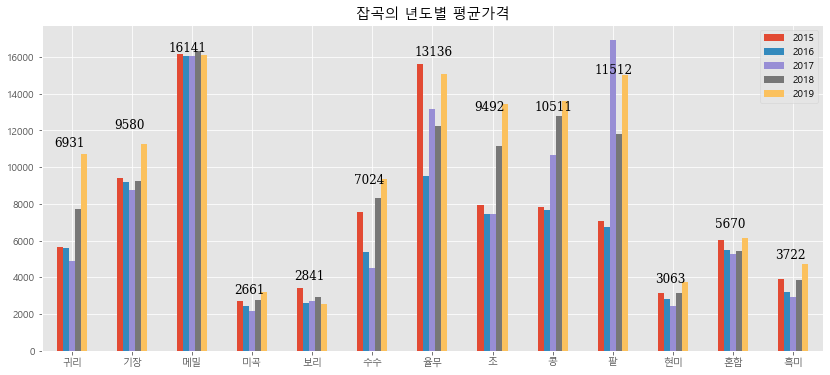

In [35]:
#막대그래프로 만들기
font1 = {
    'family': 'serif',
    'color': 'black',
    'weight': 'normal',
    'size': 12
}

fin = result.plot.bar(figsize=(14, 6), title='잡곡의 년도별 평균가격')
plt.xticks(rotation=0)

#5개년 평균가격 텍스트로 나타내기.
plt.text(-0.3, 11111, '6931', fontdict=font1)
plt.text(0.7, 12111,'9580', fontdict=font1)
plt.text(1.6, 16311,'16141', fontdict=font1)
plt.text(2.7, 3111,'2661', fontdict=font1)
plt.text(3.7, 3911,'2841', fontdict=font1)
plt.text(4.7, 9111,'7024', fontdict=font1)
plt.text(5.7, 16111,'13136', fontdict=font1)
plt.text(6.7, 13111,'9492', fontdict=font1)
plt.text(7.7, 13111,'10511', fontdict=font1)
plt.text(8.7, 15111,'11512', fontdict=font1)
plt.text(9.7, 3711,'3063', fontdict=font1)
plt.text(10.7, 6711,'5670', fontdict=font1)
plt.text(11.7, 5011,'3722', fontdict=font1)


# plt.show()
plt.savefig('잡곡가격')

In [33]:
#평균가격..ㅎㅎ
result.mean(axis=1).tolist()

[6931.704378191273,
 9580.472965701536,
 16141.29129129129,
 2661.9010342516826,
 2841.3714903675423,
 7024.833481351445,
 13136.491843552023,
 9492.178993411957,
 10511.122189056938,
 11512.31699384097,
 3063.4782625554153,
 5670.072655519642,
 3722.5557610157293]